In [70]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import re
import pandas as pd

#A function to get file name and out put file names and legend labels
def getfilename():
    path = os.getcwd()    
    filewithext = []
    filename = []
    for file in [doc for doc in os.listdir(path) if doc.endswith('.DTA')]:  
        filewithext.append(file)
        filename.append(file.replace(".DTA",""))
    return(filewithext, filename)
#A function converts scientific notationed numbers to floats
def convert_to_float(s):
    try:
        s[x_tag] = float(s[x_tag])
        s[y_tag] = float(s[y_tag])
        return s
    except:
        return s

#A function return a columns of the result of a truth table
#which x_rag and y_tag column should both be numerical values
def is_numerical(s):
    try:
        result = isinstance(s[x_tag], float) and isinstance(s[y_tag], float)
        return result
    except:
        return False

In [73]:
#user input what x and y they want to use
filename_ls, legend_ls = getfilename()[0], getfilename()[1]
x_tag = "Vf"
y_tag = "Im"
# filename = 'cv50multi.DTA'
sample = 'RuZrOx_HER'

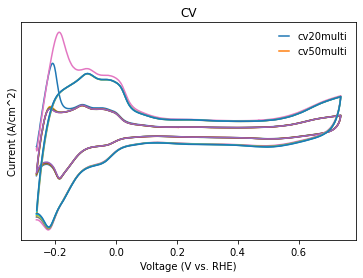

In [83]:
for filename in filename_ls:
    #get the titles of desired columns and replace the #1 \t column by 'CURVE_CYCLE'
    with open(filename, 'r') as f:
        for line in f.readlines():
            if re.search('\tPt\tT.*',line):
                data_title = line
    titles = data_title.split('\t')
    titles[-1]=titles[-1].rstrip('\n')
    titles[0] = 'CURVE_CYCLE'

    #read in data frame and fill the empty \t under CURVE_CYCLE as their curve name
    df = pd.read_csv(filename, sep = '\t', names= titles)
    df.CURVE_CYCLE.ffill(inplace=True)
    #Drop the empty entrys in x_tag and y_tag columns
    df.dropna(how = 'any', subset=[x_tag, y_tag], inplace=True)

    df[[x_tag, y_tag]] = df[[x_tag, y_tag]].apply(convert_to_float, axis= 1)
    num_df = df[df[[x_tag, y_tag]].apply(is_numerical, axis= 1)]
    num_df.reset_index(drop = True, inplace = True)

    for cycle in num_df.CURVE_CYCLE.unique():
        x, y = num_df[num_df.CURVE_CYCLE == cycle][x_tag], num_df[num_df.CURVE_CYCLE == cycle][y_tag] 
        plt.plot(x, y, label=cycle)

# current_handles, current_labels = plt.gca().get_legend_handles_labels()
# reversed_handles = list(reversed(current_handles))
# reversed_labels = list(reversed(current_labels))
plt.legend(legend_ls, frameon=False, handlelength=1)
# plt.xlim(1,20)
# plt.xticks(np.arange(1, 20, 2.0))
plt.yticks([])
plt.xlabel('Voltage (V vs. RHE)')
plt.ylabel('Current (A/cm^2)')
plt.title('CV')
plt.savefig(sample + 'CV.png')
plt.show()

['CURVE1', 'CURVE2', 'CURVE3', 'CURVE4', 'CURVE5', 'CURVE6']


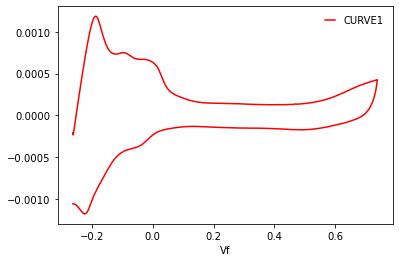

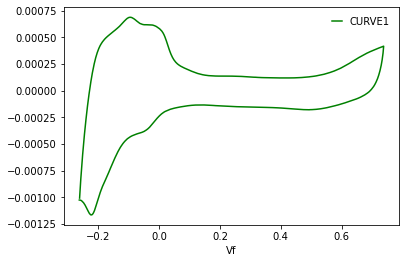

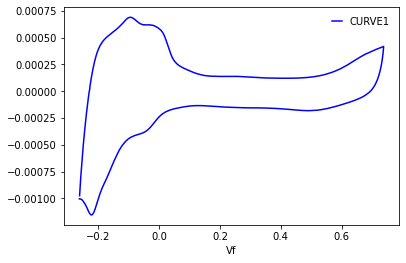

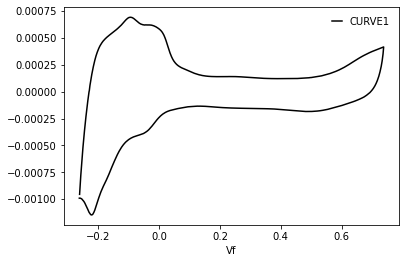

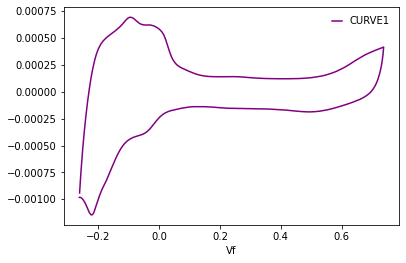

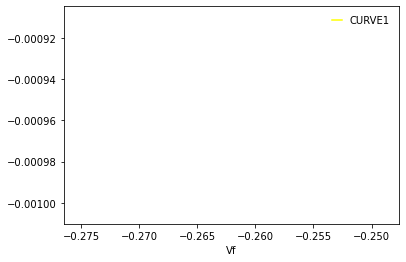

In [99]:
colors = ['red', 'green', 'blue', 'black', 'purple','yellow']
cycle_num = []
[cycle_num.append(cycle) for cycle in num_df.CURVE_CYCLE.unique()]     
print(cycle_num)
for i, cycle in enumerate(num_df.CURVE_CYCLE.unique()):
    #This print can be used to check the dataframe dimension
    #print(f'{i}, {cycle} has data with shape of {num_df[num_df.CURVE_CYCLE == cycle].shape}')
    num_df[num_df.CURVE_CYCLE == cycle].plot(x = x_tag, y = y_tag, color = {y_tag: colors[i]} )
    plt.legend(cycle_num, frameon=False, handlelength=1)

In [50]:
def dataslice(filename):
    with open(filename, 'r') as f:
        for line in f.readlines():
            if re.search('\tPt\tT.*',line):
                data_title = line
                print(data_title)
    titles = data_title.split('\t')
    titles[-1]=titles[-1].rstrip('\n')
    df = pd.read_csv(filename, delimiter = '\t', names = titles)
    del df[titles[0]]
    titles.remove(titles[0])
    mask = df[titles] == titles
    df[mask].dropna().index
    new = df[[x_tag, y_tag]]
    pos = 0
    for key in cycle_num:
        cycle_raw_dict[key] = new.iloc[df[mask].dropna().index[pos]+2:df[mask].dropna().index[pos+1]-1,:] 
        pos = pos+1
    return (cycle_raw_dict)

In [51]:
example = dataslice('cv20multi.DTA')
example
# print(example['cycle1'])
#       Vf    Im
# 59    -1  -1.1
# 60  -1.2  -1.2

	Pt	T	Vf	Im	Vu	Sig	Ach	IERange	Over	Temp

	Pt	T	Vf	Im	Vu	Sig	Ach	IERange	Over	Temp

	Pt	T	Vf	Im	Vu	Sig	Ach	IERange	Over	Temp

	Pt	T	Vf	Im	Vu	Sig	Ach	IERange	Over	Temp

	Pt	T	Vf	Im	Vu	Sig	Ach	IERange	Over	Temp

	Pt	T	Vf	Im	Vu	Sig	Ach	IERange	Over	Temp



NameError: name 'cycle_num' is not defined

In [ ]:
# #the next thing to solve is plotting data
# list(cycle_raw_dict.values())[0]

In [ ]:
filename = 'eis.DTA'
with open(filename, 'r') as f:
    for line in f.readlines():
        if re.search('\tPt\tT.*',line):
            data_title = line
titles = data_title.split('\t')
titles[-1]=titles[-1].rstrip('\n')
df = pd.read_csv(filename, delimiter = '\t', names = titles)
del df[titles[0]]
titles.remove(titles[0])
mask = df[titles] == titles
new = df[[x_tag, y_tag]]
new[~new.Zreal.str.contains("*")]
print(new.dropna())
pos = 0
for key in cycle_num:
    try:
        cycle_raw_dict[key] = new.iloc[df[mask].dropna().index[pos]+2:df[mask].dropna().index[pos+1]-1,:] 
    except:
        break
    pos = pos+1
#print(cycle_raw_dict)